In [ ]:
import pandas as pd
# import numpy as np
# import datetime
from optbinning import OptimalBinning
# from optbinning import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt



z10 = pd.read_csv(r"C:\Users\gromo\OneDrive\Documents\transactions_diy.csv") # фрейма профиль клиента на 01.09.2019 (трейн)
z11 = pd.read_csv(r"C:\Users\gromo\OneDrive\Documents\transactions_diy.csv") # фрейма профиль клиента на 01.10.2019 (тест)
z12 = pd.read_csv(r"C:\Users\gromo\OneDrive\Documents\transactions_diy.csv") # фрейма профиль клиента на 01.11.2019 (прогноз)

# загружаем датасет Продажи

In [ ]:
opt_binner1 = OptimalBinning(min_bin_size=0.05, max_n_bins=5)


x1 = z11['ваш показатель']
x2 = z11['событие']


opt_binner1.fit_transform(x1, x2)

opt_binner1.status
binning_table1 = opt_binner1.binning_table
binning_table1.build()

In [ ]:
binning_table1.plot(metric="woe")

In [ ]:
binning_table1.plot(metric="iv")

In [ ]:
opt_binner2 = OptimalBinning(min_bin_size=0.05, max_n_bins=5)


x1 = z11['ваш показатель']
x2 = z11['событие']


opt_binner2.fit_transform(x1, x2)

opt_binner2.status
binning_table2 = opt_binner2.binning_table
binning_table2.build()

In [ ]:
binning_table2.plot(metric="woe")

In [ ]:
binning_table2.plot(metric="iv")

In [ ]:
train_1 = z10
test_1 = z11[['ClientID', 'R', 'fact']]

In [207]:
def opt_binning(df1, feature, event, df2):
    global df3, binning_table1, df4
    opt_binner = OptimalBinning(min_bin_size=0.05, max_n_bins=5)
    x1 = df1[feature]
    x2 = df1[event]
    x3 = df2[feature]
    opt_binner.fit_transform(x1, x2)
    binning_table1 = opt_binner.binning_table
    binned_feature1 = opt_binner.transform(x1, metric='indices')
    binned_feature2 = opt_binner.transform(x1, metric='bins')
    binned_feature3 = opt_binner.transform(x3, metric='indices')
    binned_feature4 = opt_binner.transform(x3, metric='bins')
    df3 = df1.assign(bin_num=binned_feature1)
    df3 = df3.assign(bin_name=binned_feature2) 
    df4 = df2.assign(bin_num=binned_feature3)
    df4 = df4.assign(bin_name=binned_feature4)
    return df3, binning_table1, df4

In [208]:
# Для построения тривиальной модели первым этапом будет проведение биннига по test/train (бины от train)
train_1_1 = train_1[['ClientID', 'R', 'fact']]

feature_1 = 'R'
event_1 = 'fact'
opt_binning(train_1_1, feature_1, event_1, test_1)
train_1_1 = df3
test_1_1 = df4

Точность тривиальной модели по 1 бину:  0.8220215554908243
Значение AUC тривиальной модели по 1 бину:  0.5920982986901357


d:\SPBPU\1_course\1_sem\MLOps\second_task\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


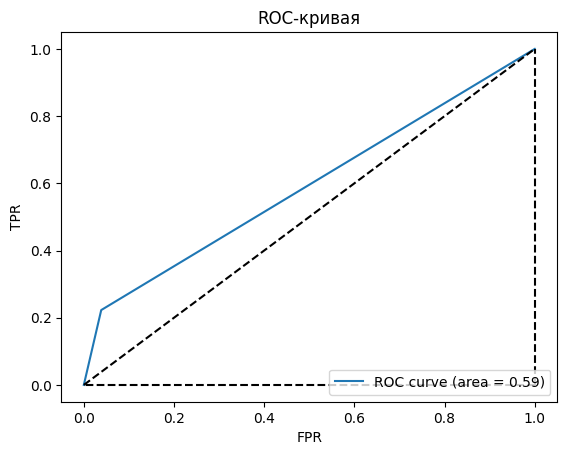

In [ ]:
# Модель регрессии по тривиальному показателю

log_reg_1 = LogisticRegression()
X1 = train_1_1[['bin_num']]
y1 = train_1_1[['fact']]
X2 = test_1_1[['bin_num']]
y2 = test_1_1[['fact']]

log_reg_1.fit(X1, y1)

y_predictions = log_reg_1.predict(X2)
accuracy = accuracy_score(y2, y_predictions)
roc_auc1 = roc_auc_score(y2, y_predictions)
print('Точность тривиальной модели по 1 бину: ', accuracy)
print('Значение AUC тривиальной модели по 1 бину: ', roc_auc1)

fpr, tpr, thresholds = roc_curve(y2, y_predictions)
roc_auc1_1 = auc(fpr, tpr)

# Построение ROC-кривой
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc1_1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1, 0], [0, 0], 'k--')
plt.plot([1, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()


In [211]:
train_1_2 = z10[['ClientID', 'R', 'fact', 'F', 'M', 'variance_item_group', 'weekdays_visits', 'last_date_amount']]
test_1_2 = z11[['ClientID', 'R', 'fact', 'F', 'M', 'variance_item_group', 'weekdays_visits', 'last_date_amount']]
z10[['F', 'M', 'R', 'weekdays_visits', 'variance_item_group', 'variance_item', 'last_date_amount']].corr(method='pearson')

,F,M,R,weekdays_visits,variance_item_group,variance_item,last_date_amount
F,1.000000,0.613597,-0.304814,0.778892,0.701987,0.989089,-0.057153
M,0.613597,1.000000,-0.182789,0.492944,0.450223,0.593665,0.155032
R,-0.304814,-0.182789,1.000000,-0.319533,-0.413137,-0.315283,0.069253
weekdays_visits,0.778892,0.492944,-0.319533,1.000000,0.654691,0.751821,-0.090030
variance_item_group,0.701987,0.450223,-0.413137,0.654691,1.000000,0.727884,-0.070545
variance_item,0.989089,0.593665,-0.315283,0.751821,0.727884,1.000000,-0.058739
last_date_amount,-0.057153,0.155032,0.069253,-0.090030,-0.070545,-0.058739,1.000000


In [ ]:
# Биннинг для 2 и более независимых переменных:

def opt_binning1(df1, features, event, df2):
    global df3, binning_table1, df4
    opt_binner = OptimalBinning(min_bin_size=0.05, max_n_bins=5)
    df3 = df1
    df4 = df2
    for m in features:
        x1 = df1[m]
        x2 = df1[event]
        x3 = df2[m]
        m1 = m + '_bin_num'
        n1 = m + '_bin_name'
        opt_binner.fit_transform(x1, x2)
        binning_table1 = opt_binner.binning_table
        binned_feature1 = opt_binner.transform(x1, metric='indices')
        binned_feature2 = opt_binner.transform(x1, metric='bins')
        binned_feature3 = opt_binner.transform(x3, metric='indices')
        binned_feature4 = opt_binner.transform(x3, metric='bins')
        df3[m1] = binned_feature1
        df3[n1] = binned_feature2
        df4[m1] = binned_feature3
        df4[n1] = binned_feature4
    return df3, binning_table1, df4

In [213]:
feature_3 = ['R', 'F', 'M', 'variance_item_group', 'weekdays_visits', 'last_date_amount']
event_3 = 'fact'

opt_binning1(train_1_2, feature_3, event_3, test_1_2)

train_1_2 = df3
test_1_2 = df4

C:\Users\gromo\AppData\Local\Temp\ipykernel_8120\2736452459.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[m1] = binned_feature1
C:\Users\gromo\AppData\Local\Temp\ipykernel_8120\2736452459.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[n1] = binned_feature2
C:\Users\gromo\AppData\Local\Temp\ipykernel_8120\2736452459.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Точность многофакторной модели логистической регрессии по бинам:  0.8316341392368191
Значение AUC многофакторной модели логистической регрессии по бинам:  0.617123601721094
Отношение AUC тривиальной модели логистической регрессии к многофакторной модели логистической регрессии по бинам:  0.9594484752144217


d:\SPBPU\1_course\1_sem\MLOps\second_task\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


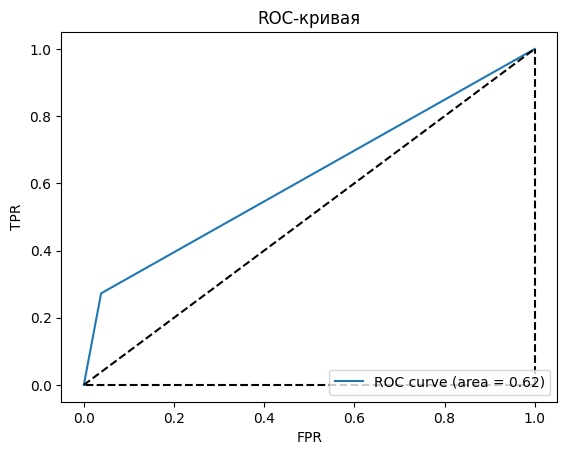

In [ ]:
# Модель регрессии по 6 переменным

log_reg_3 = LogisticRegression()
X5 = train_1_2[['R_bin_num', 'F_bin_num', 'M_bin_num',
                 'variance_item_group_bin_num', 'weekdays_visits_bin_num',
                'last_date_amount_bin_num']]
y5 = train_1_2[['fact']]
X6 = test_1_2[['R_bin_num', 'F_bin_num', 'M_bin_num',
                 'variance_item_group_bin_num', 'weekdays_visits_bin_num',
                'last_date_amount_bin_num']]
y6 = test_1_2[['fact']]

log_reg_3.fit(X5, y5)

y_predictions3 = log_reg_3.predict(X6)
accuracy3 = accuracy_score(y6, y_predictions3)
roc_auc3 = roc_auc_score(y6, y_predictions3)
print('Точность многофакторной модели логистической регрессии: ', accuracy3)
print('Значение AUC многофакторной модели логистической регрессии: ', roc_auc3)
print('Отношение AUC тривиальной модели логистической регрессии к многофакторной модели логистической регрессии: ', roc_auc1 / roc_auc3)

fpr, tpr, thresholds = roc_curve(y6, y_predictions3)
roc_auc3_1 = auc(fpr, tpr)

# Построение ROC-кривой
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc3_1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1, 0], [0, 0], 'k--')
plt.plot([1, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

In [216]:
# ЗАДАНИЕ
# Показатели долей визитов в выходных и долей трат в последнем визите
train_1_3 = z10[['ClientID', 'R', 'fact', 'F', 'M', 'variance_item_group', 'fraction_weekdays_visits', 'fraction_last_date_amount']]
test_1_3 = z11[['ClientID', 'R', 'fact', 'F', 'M', 'variance_item_group', 'fraction_weekdays_visits', 'fraction_last_date_amount']]

# Матрица корреляций
train_1_3[['R', 'F', 'M', 'variance_item_group', 'fraction_weekdays_visits', 'fraction_last_date_amount']].corr()


,R,F,M,variance_item_group,fraction_weekdays_visits,fraction_last_date_amount
R,1.000000,-0.304814,-0.182789,-0.413137,0.005182,0.441079
F,-0.304814,1.000000,0.613597,0.701987,-0.014478,-0.443774
M,-0.182789,0.613597,1.000000,0.450223,-0.015990,-0.272373
variance_item_group,-0.413137,0.701987,0.450223,1.000000,-0.013147,-0.661543
fraction_weekdays_visits,0.005182,-0.014478,-0.015990,-0.013147,1.000000,0.018778
fraction_last_date_amount,0.441079,-0.443774,-0.272373,-0.661543,0.018778,1.000000


In [217]:
# Далее необходимо провести WOE и IV анализ, для этого будет использоваться Train-выборка
feature_5 = 'fraction_weekdays_visits'
event_5 = 'fact'

opt_binning(train_1_3, feature_5, event_5, test_1_3)

binning_table2 = binning_table1
binning_table2.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.02)",13749,0.344535,12462,1287,0.093607,0.812011,0.173797,0.021147
1,"[0.02, 0.33)",8019,0.200947,5203,2816,0.351166,-0.844441,0.180044,0.021860
2,"[0.33, 0.48)",6331,0.158648,4502,1829,0.288896,-0.557606,0.057882,0.007143
3,"[0.48, 0.97)",6875,0.172280,5666,1209,0.175855,0.086331,0.001250,0.000156
4,"[0.97, inf)",4932,0.123590,4542,390,0.079075,0.996617,0.088208,0.010591
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,39906,1.000000,32375,7531,0.188718,,0.501181,0.060897


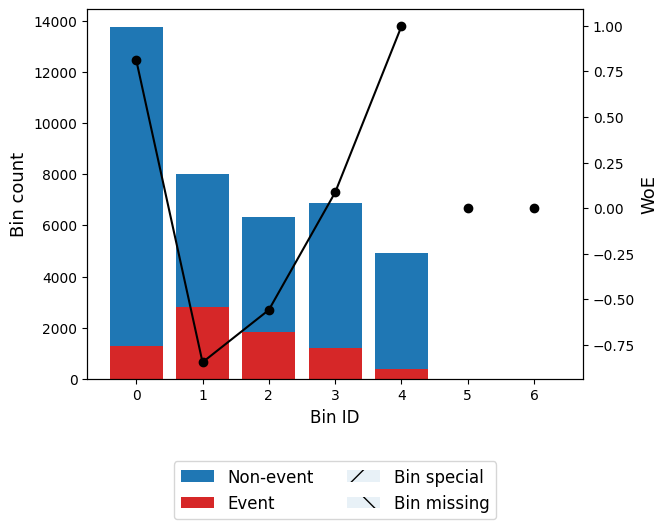

In [218]:
binning_table2.plot(metric="woe")

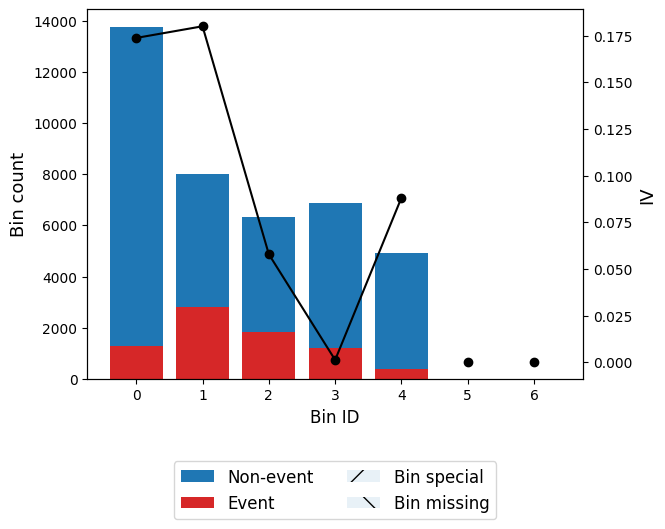

In [219]:
binning_table2.plot(metric="iv")

In [220]:
feature_6 = 'fraction_last_date_amount'
event_6 = 'fact'

opt_binning(train_1_3, feature_6, event_6, test_1_3)

binning_table3 = binning_table1
binning_table3.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.02)",5716,0.143237,3649,2067,0.361617,-0.890004,0.143963,0.017424
1,"[0.02, 0.05)",5049,0.126522,3604,1445,0.286195,-0.544424,0.043855,0.005415
2,"[0.05, 0.21)",8421,0.211021,6539,1882,0.223489,-0.212909,0.010203,0.001273
3,"[0.21, 0.97)",8282,0.207538,6943,1339,0.161676,0.187452,0.006871,0.000858
4,"[0.97, inf)",12438,0.311682,11640,798,0.064158,1.221735,0.309801,0.036483
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,39906,1.000000,32375,7531,0.188718,,0.514694,0.061453


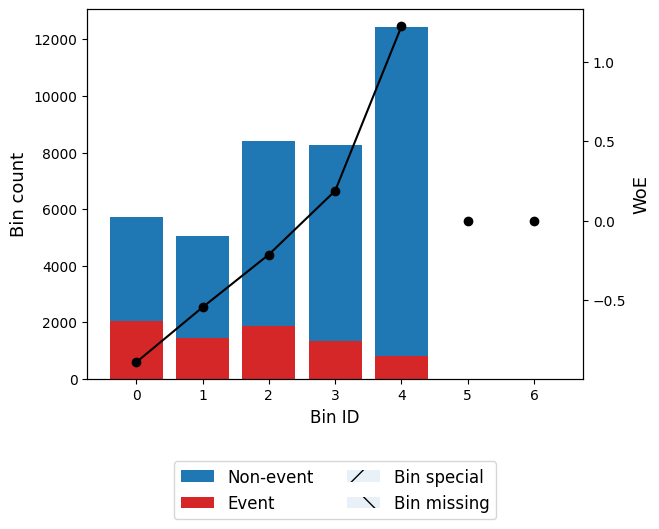

In [221]:
binning_table3.plot(metric="woe")

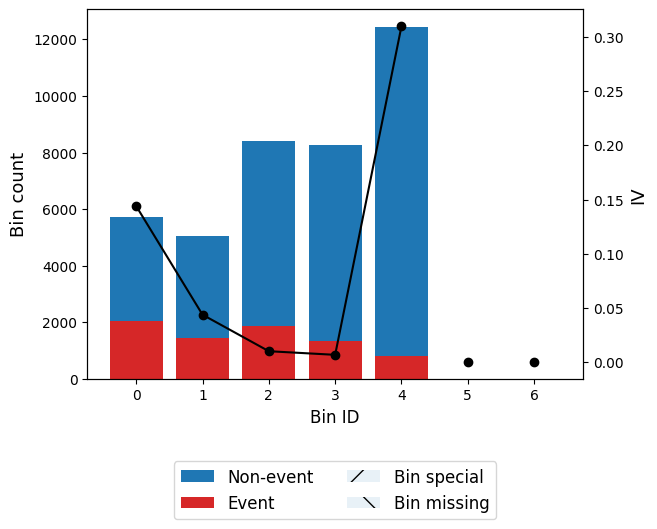

In [222]:
binning_table3.plot(metric="iv")

In [223]:
feature_7 = ['fraction_weekdays_visits', 'fraction_last_date_amount', 'variance_item_group', 'F', 'R', 'M']
event_7 = 'fact'

opt_binning1(train_1_3, feature_7, event_7, test_1_3)

train_1_3 = df3
test_1_3 = df4

C:\Users\gromo\AppData\Local\Temp\ipykernel_8120\2736452459.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[m1] = binned_feature1
C:\Users\gromo\AppData\Local\Temp\ipykernel_8120\2736452459.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[n1] = binned_feature2
C:\Users\gromo\AppData\Local\Temp\ipykernel_8120\2736452459.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [ ]:
log_reg_5 = LogisticRegression(penalty='l1', solver='liblinear')
log_reg_6 = LogisticRegression(penalty='l2')
class_for_reg_1 = RandomForestClassifier()

log_reg_5_1 = log_reg_5
log_reg_6_1 = log_reg_6
class_for_reg_1 = class_for_reg_1

X7 = train_1_3[['R_bin_num', 'F_bin_num', 'M_bin_num',
                 'variance_item_group_bin_num', 'fraction_weekdays_visits_bin_num',
                'fraction_last_date_amount_bin_num']]
y7 = train_1_3[['fact']]
X8 = test_1_3[['R_bin_num', 'F_bin_num', 'M_bin_num',
                 'variance_item_group_bin_num', 'fraction_weekdays_visits_bin_num',
                'fraction_last_date_amount_bin_num']]
y8 = test_1_3['fact']

Точность модели логистической регрессии с L1-регуляризацей по бинам:  0.8298863967375474
Значение AUC модели логистической регрессии с L1-регуляризацей:  0.6132824890063077
Отношение AUC тривиальной модели к многофакторной модели логистической регрессии с L1-регуляризацией по бинам:  0.9654576957667643


d:\SPBPU\1_course\1_sem\MLOps\second_task\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


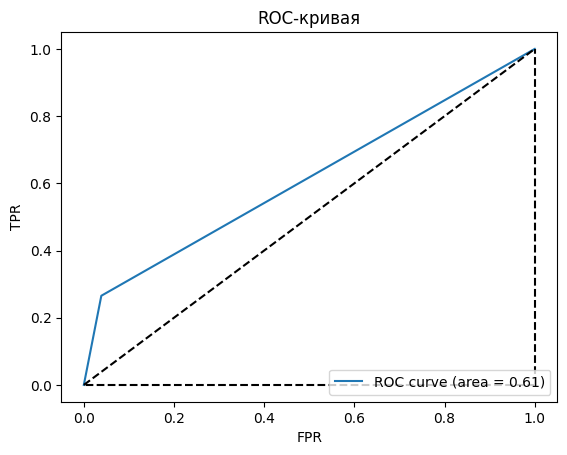

In [ ]:
# Результаты Lasso

log_reg_5_1.fit(X7, y7)

y_predictions5 = log_reg_5_1.predict(X8)
accuracy5 = accuracy_score(y8, y_predictions5)
roc_auc5 = roc_auc_score(y8, y_predictions5)
print('Точность модели логистической регрессии с L1-регуляризацей: ', accuracy5)
print('Значение AUC модели логистической регрессии с L1-регуляризацей: ', roc_auc5)
print('Отношение AUC тривиальной модели к многофакторной модели логистической регрессии с L1-регуляризацией: ', roc_auc1 / roc_auc5)

fpr, tpr, thresholds = roc_curve(y8, y_predictions5)
roc_auc5_1 = auc(fpr, tpr)

# Построение ROC-кривой
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc5_1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1, 0], [0, 0], 'k--')
plt.plot([1, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

Точность модели логистической регрессии с L2-регуляризацей по бинам:  0.8299349451403049
Значение AUC модели логистической регрессии с L2-регуляризацей по бинам:  0.6133124094180126
Отношение AUC тривиальной модели к многофакторной логистической регрессии с L2-регуляризацией по бинам:  0.9654105959668949


d:\SPBPU\1_course\1_sem\MLOps\second_task\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


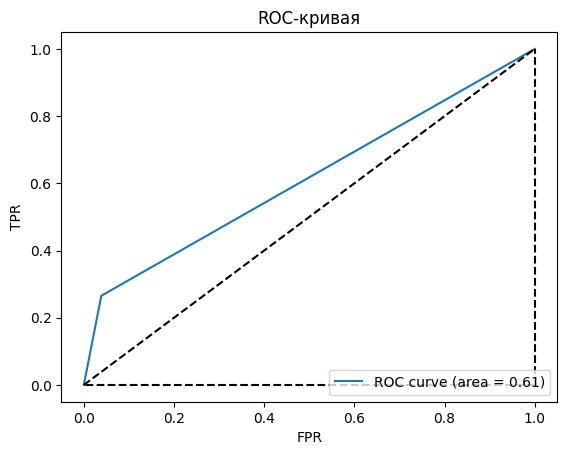

In [ ]:
# Результаты Ridge 
log_reg_6_1.fit(X7, y7)

y_predictions6 = log_reg_6_1.predict(X8)
accuracy6 = accuracy_score(y8, y_predictions6)
roc_auc6 = roc_auc_score(y8, y_predictions6)
print('Точность модели логистической регрессии с L2-регуляризацей: ', accuracy6)
print('Значение AUC модели логистической регрессии с L2-регуляризацей: ', roc_auc6)
print('Отношение AUC тривиальной модели к многофакторной логистической регрессии с L2-регуляризацией: ', roc_auc1 / roc_auc6)

fpr, tpr, thresholds = roc_curve(y8, y_predictions6)
roc_auc6_1 = auc(fpr, tpr)

# Построение ROC-кривой
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc6_1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1, 0], [0, 0], 'k--')
plt.plot([1, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

d:\SPBPU\1_course\1_sem\MLOps\second_task\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Точность модели классификации случайных лесов по бинам:  0.8202980871929314
Значение AUC модели классификации случайных лесов по бинам:  0.6160106386115068
Отношение AUC тривиальной модели к модели классификации случайных лесов по бинам:  0.9611819367677322


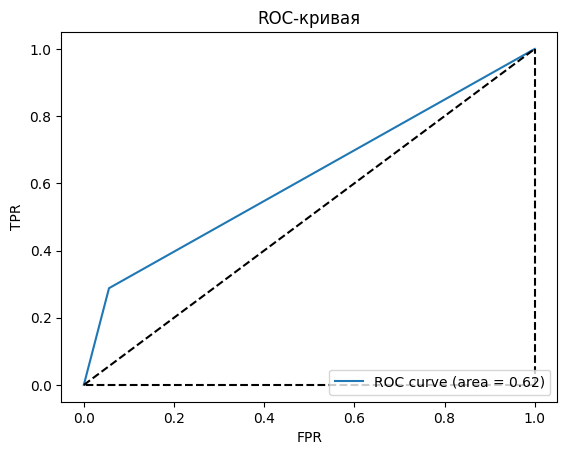

In [ ]:
# Результаты классификатора случайных лесов
class_for_reg_1.fit(X7, y7)

y_predictions7 = class_for_reg_1.predict(X8)
accuracy7 = accuracy_score(y8, y_predictions7)
roc_auc7 = roc_auc_score(y8, y_predictions7)
print('Точность модели классификации случайных лесов: ', accuracy7)
print('Значение AUC модели классификации случайных лесов: ', roc_auc7)
print('Отношение AUC тривиальной модели к модели классификации случайных лесов : ', roc_auc1 / roc_auc7)

fpr, tpr, thresholds = roc_curve(y8, y_predictions7)
roc_auc7_1 = auc(fpr, tpr)

# Построение ROC-кривой
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc7_1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1, 0], [0, 0], 'k--')
plt.plot([1, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()


In [231]:
# ПРОГНОЗ
# Для построения тривиальной модели первым этапом будет проведение биннига по test/train (бины от train)
train_1_4 = train_1[['ClientID', 'R', 'fact']]
test_1_4 = z12[['ClientID', 'R', 'fact']]

feature_1 = 'R'
event_1 = 'fact'
opt_binning(train_1_4, feature_1, event_1, test_1_4)
train_1_4 = df3
test_1_4 = df4

In [ ]:
# Тривиальная модель

log_reg_7 = LogisticRegression()
X11 = train_1_4[['bin_num']]
y11 = train_1_4[['fact']]
X12 = test_1_4[['bin_num']]
y12 = test_1_4[['fact']]

log_reg_7.fit(X11, y11)

y_predictions11 = log_reg_7.predict(X12)
accuracy11 = accuracy_score(y12, y_predictions11)
print('Точность тривиальной модели логистической регресии: ', accuracy11)

Точность модели логистической регресии по 1 бину:  0.9265194404154775


d:\SPBPU\1_course\1_sem\MLOps\second_task\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Многофакторные модели

feature_9 = ['fraction_weekdays_visits', 'fraction_last_date_amount', 'variance_item_group', 'F', 'R', 'M']
event_9 = 'fact'
train_1_5 = train_1[['ClientID', 'fact', 'fraction_weekdays_visits', 'fraction_last_date_amount', 'variance_item_group', 'F', 'R', 'M']]
test_1_5 = z12[['ClientID', 'fact', 'fraction_weekdays_visits', 'fraction_last_date_amount', 'variance_item_group', 'F', 'R', 'M']]

opt_binning1(train_1_5, feature_9, event_9, test_1_5)

train_1_5 = df3
test_1_5 = df4

C:\Users\gromo\AppData\Local\Temp\ipykernel_8120\2736452459.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[m1] = binned_feature1
C:\Users\gromo\AppData\Local\Temp\ipykernel_8120\2736452459.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[n1] = binned_feature2
C:\Users\gromo\AppData\Local\Temp\ipykernel_8120\2736452459.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [ ]:
log_reg_9 = LogisticRegression(penalty='l1', solver='liblinear')
log_reg_10 = LogisticRegression(penalty='l2')
class_for_reg_3 = RandomForestClassifier()

log_reg_9_1 = log_reg_9
log_reg_10_1 = log_reg_10
class_for_reg_3_1 = class_for_reg_3

X15 = train_1_5[['R_bin_num', 'F_bin_num', 'M_bin_num',
                 'variance_item_group_bin_num', 'fraction_weekdays_visits_bin_num',
                'fraction_last_date_amount_bin_num']]
y15 = train_1_5[['fact']]
X16 = test_1_5[['R_bin_num', 'F_bin_num', 'M_bin_num',
                 'variance_item_group_bin_num', 'fraction_weekdays_visits_bin_num',
                'fraction_last_date_amount_bin_num']]
y16 = test_1_5['fact']

In [ ]:
# Результаты Lasso

log_reg_9_1.fit(X15, y15)

y_predictions13 = log_reg_9_1.predict(X16)
accuracy13 = accuracy_score(y16, y_predictions13)
print('Точность модели логистической регрессии с L1-регуляризацей: ', accuracy13)

Точность модели логистической регрессии с L1-регуляризацей по бинам:  0.9178402657558602


d:\SPBPU\1_course\1_sem\MLOps\second_task\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Результаты Ridge

log_reg_10_1.fit(X15, y15)

y_predictions14 = log_reg_10_1.predict(X16)
accuracy14 = accuracy_score(y16, y_predictions14)
print('Точность модели логистической регрессии с L2-регуляризацией: ', accuracy14)

Точность модели логистической регрессии с L2-регуляризацией по признакам:  0.917910447761194


d:\SPBPU\1_course\1_sem\MLOps\second_task\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Результаты классификатора случайных лесов
class_for_reg_3_1.fit(X15, y15)
y_predictions15 = class_for_reg_3_1.predict(X16)
accuracy15 = accuracy_score(y16, y_predictions15)
print('Точность модели классификации случайных лесов: ', accuracy15)

d:\SPBPU\1_course\1_sem\MLOps\second_task\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Точность модели классификации случайных лесов по бинам:  0.9034061666588686
